In [3]:
import torch
from torch.utils.data import Dataset,DataLoader,SequentialSampler,RandomSampler,BatchSampler,default_collate
import matplotlib.pyplot as plt
from torch.nn import Linear
from torch import optim,nn
import os
# import torchvision.transforms.functional as func
import cv2
import numpy as np
import glob

In [4]:
# from numpy import imag


class shape_dataset(Dataset):
    def __init__(self,path_list):
        self.path_list=path_list
        self.label=np.array([[0]*1000,[1]*1000,[2]*1000,[3]*1000,[4]*1000],dtype=np.float32).flatten()

    def __getitem__(self,index):
        self.image=cv2.imread(self.path_list[index],cv2.IMREAD_GRAYSCALE)
        self.image=cv2.resize(self.image,(50,50),cv2.INTER_LINEAR)
        self.image=torch.tensor(self.image).float()/255.0
        self.label[index]=torch.tensor(self.label[index]).float()

        return self.image,self.label[index]

    def __len__(self):
        return len(self.path_list)

In [5]:

path_list=glob.glob("Shape_Data/**/*.jpg")

path_list
path_list[:1000]

['Shape_Data/Circle/circle0.jpg',
 'Shape_Data/Circle/circle1.jpg',
 'Shape_Data/Circle/circle2.jpg',
 'Shape_Data/Circle/circle3.jpg',
 'Shape_Data/Circle/circle4.jpg',
 'Shape_Data/Circle/circle5.jpg',
 'Shape_Data/Circle/circle6.jpg',
 'Shape_Data/Circle/circle7.jpg',
 'Shape_Data/Circle/circle8.jpg',
 'Shape_Data/Circle/circle9.jpg',
 'Shape_Data/Circle/circle10.jpg',
 'Shape_Data/Circle/circle11.jpg',
 'Shape_Data/Circle/circle12.jpg',
 'Shape_Data/Circle/circle13.jpg',
 'Shape_Data/Circle/circle14.jpg',
 'Shape_Data/Circle/circle15.jpg',
 'Shape_Data/Circle/circle16.jpg',
 'Shape_Data/Circle/circle17.jpg',
 'Shape_Data/Circle/circle18.jpg',
 'Shape_Data/Circle/circle19.jpg',
 'Shape_Data/Circle/circle20.jpg',
 'Shape_Data/Circle/circle21.jpg',
 'Shape_Data/Circle/circle22.jpg',
 'Shape_Data/Circle/circle23.jpg',
 'Shape_Data/Circle/circle24.jpg',
 'Shape_Data/Circle/circle25.jpg',
 'Shape_Data/Circle/circle26.jpg',
 'Shape_Data/Circle/circle27.jpg',
 'Shape_Data/Circle/circle28.j

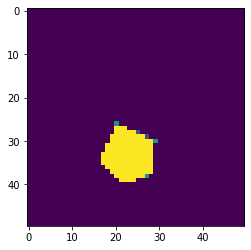

In [6]:
dataset=shape_dataset(path_list)
dataset[0][0]
# plt.imshow(dataset[100][0])
plt.imshow(dataset[1002][0])

5000


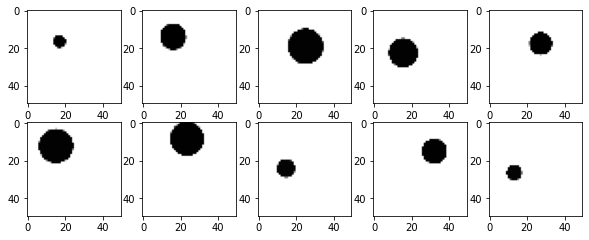

In [7]:
fig= plt.figure(figsize=(10, 10))
for i in range(10):
    
    fig.add_subplot(5,5,i+1)
    plt.imshow(dataset[i][0],cmap="gray")
print(len(dataset))

In [8]:
batch_size=10


# train_loader=[]
# test_loader=[]

train_size = int(0.8 * len(dataset))
test_size = int(0.2*len(dataset))

print(train_size,test_size)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])



4000 1000


400


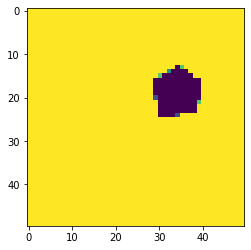

In [9]:
train_loader=DataLoader(train_dataset,batch_size=batch_size)
test_loader=DataLoader(test_dataset,batch_size=batch_size)

# for i in train_dataset:
plt.imshow(train_dataset[0][0])
print(len(train_loader))

In [10]:
train_dataset[0][0].shape

torch.Size([50, 50])

In [11]:
class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        x=x.flatten()
        out=self.linear(x)
        # print(out)
        return out


In [12]:
criteria=nn.MSELoss()


In [13]:
torch.manual_seed(1)
lr=LR(2500,1)

sgd=optim.SGD(lr.parameters(),0.0006)


print(list(lr.parameters()))


def Shape_nn(lr,train_loader,test_loader,sgd,criteria):
    fig=plt.figure(figsize=(10,10))

    test_loss=[]
    train_loss=[]
    for epoch in range(100):
    
        for x,y in train_loader:
            # print(x)
            yhat_train=lr(x)
        
            trloss=criteria(y,yhat_train)

            # print("y, yhat  ",y,yhat_train)
            sgd.zero_grad()
            trloss.backward()
            sgd.step()
        train_loss.append(trloss.detach().numpy())
        print(f"for epoch {epoch} | train_loss :: {trloss}".format(epoch,trloss))
        
        # train_loss.append(train_loss)
        # fig.add_subplot(5,5,epoch+1)
        # plt.plot(train_loss)
        print(yhat_train.shape)
        for x2,y2 in test_loader:
            yhat_test=lr(x2)
            tsloss=criteria(yhat_test,y2)
        print(f"for epoch {epoch} | test_loss :: {tsloss}".format(epoch,tsloss)) 
        test_loss.append(tsloss.detach().numpy())       
    
    # print(f"for epoch {i} | train_loss :: {train_loss03978462144732475[i]}".format(i,train_loss[i]))

    


    # print("epoch {}:: , train_loss {} ::: , test_loss {}".format(epoch,trloss,tsloss))
    return lr,train_loss,test_loss

[Parameter containing:
tensor([[ 0.0103, -0.0088, -0.0039,  ...,  0.0118, -0.0179, -0.0041]],
       requires_grad=True), Parameter containing:
tensor([0.0022], requires_grad=True)]


In [14]:
predicted,test_loss,train_loss=Shape_nn(lr,train_loader,test_loader,sgd,criteria)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x25000 and 2500x1)

<Figure size 720x720 with 0 Axes>

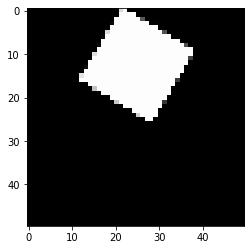

In [317]:
# test_img=np.zeros((500,500),dtype=np.uint8)
# cv2.circle(test_img,(100,100),100,[255,255,255],thickness=-1)
test_img=cv2.imread("Shape_Data/Square/square6.jpg",cv2.IMREAD_GRAYSCALE)
test_img=cv2.resize(test_img,(50,50),cv2.INTER_AREA)
test_img=torch.tensor(test_img,dtype=torch.float32)/255.0
plt.imshow(test_img,cmap="gray")

In [318]:
print(predicted(test_img))

tensor([[1.9281]], grad_fn=<AddmmBackward0>)


In [187]:
predicted.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0083, -0.0054, -0.0005,  ...,  0.0098, -0.0199, -0.0061]])),
             ('linear.bias', tensor([1.9814]))])

In [25]:
x=(np.ones((3,1)))
x

array([[1.],
       [1.],
       [1.]])